In [1]:
'''
Oppgave 1
Lag et program som presenterer de tre mest brukte startlokasjonene og de tre minst 
brukte startlokasjonene. Presentasjonen skal også vise antall turer fra disse startlokasjonene.
Del 1 bruker Pandas.
Del 2 bruker Python-dictionary.
'''

import pandas as pd

# Last inn dataene fra CSV-filen
df = pd.read_csv('05.csv')

# Grupper dataene etter startlokasjon og tell antall turer for hver startlokasjon
location_counts = df['start_station_name'].value_counts()

# Få de tre mest brukte startlokasjonene
top_three = location_counts.nlargest(3)

# Få de tre minst brukte startlokasjonene
bottom_three = location_counts.nsmallest(3)

# Presenter resultatene
print("De tre mest brukte startlokasjonene:")
for location, count in top_three.items():
    print(f"{location}: {count} turer")

print("\nDe tre minst brukte startlokasjonene:")
for location, count in bottom_three.items():
    print(f"{location}: {count} turer")

De tre mest brukte startlokasjonene:
Alexander Kiellands Plass: 2108 turer
Ringnes Park: 1928 turer
Aker Brygge: 1871 turer

De tre minst brukte startlokasjonene:
Tordenskiolds gate: 53 turer
Kværnerveien: 59 turer
Gaustad T-bane: 62 turer


In [1]:
import csv

# Les dataene fra CSV-filen
with open('05.csv', 'r', encoding="utf-8") as file:
    reader = csv.reader(file)
    next(reader)  # Skip the header row
    data = list(reader)

# Hent startlokasjonene
# Opprett en tom liste for startlokasjonene
start_locations = []

# Gå gjennom hver rad i data
for row in data:
    # Hent ut startlokasjonen, som er det femte elementet i raden
    start_location = row[4]
    
    # Legg til startlokasjonen i listen
    start_locations.append(start_location)    

# Alternativt kan vi bruke list comprehension for å gjøre det samme
# start_locations = [row[4] for row in data] 

# Tell antall turer for hver startlokasjon
location_counts = {}
for location in start_locations:
    if location in location_counts:
        location_counts[location] += 1
    else:
        location_counts[location] = 1

# Sorter ordboken etter antall turer
sorted_locations = sorted(location_counts.items(), key=lambda item: item[1]) # item[1] er antall turer i ordboken

# Få de tre mest brukte startlokasjonene
top_three = sorted_locations[-3:]

# Få de tre minst brukte startlokasjonene
bottom_three = sorted_locations[:3]

# Presenter resultatene
print("De tre mest brukte startlokasjonene:")
for location, count in reversed(top_three):
    print(f"{location}: {count} turer")

print("\nDe tre minst brukte startlokasjonene:")
for location, count in bottom_three:
    print(f"{location}: {count} turer")

De tre mest brukte startlokasjonene:
Alexander Kiellands Plass: 2108 turer
Ringnes Park: 1928 turer
Aker Brygge: 1871 turer

De tre minst brukte startlokasjonene:
Tordenskiolds gate: 53 turer
Kværnerveien: 59 turer
Gaustad T-bane: 62 turer


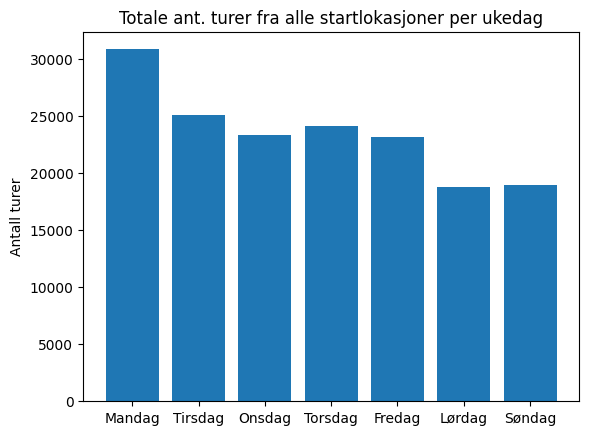

In [3]:
'''
Oppgave 2
Utvid programmet slik at det også presenter et passende diagram som viser totalt antall turer 
fra alle startlokasjoner til sammen, per ukedag.
'''

import csv
import matplotlib.pyplot as plt
from datetime import datetime

# Les dataene fra CSV-filen
with open('05.csv', 'r') as file:
    reader = csv.reader(file)
    next(reader)  # Hopp over overskriftsraden
    data = list(reader)

# Hent startdatoene
# Alt. 1 - med list comprehension
#start_dates = [row[0].split(' ')[0] for row in data]  # stated_at er rad 0. Vi splitter på mellomrom og tar kun datoen
# Alt. 2 - på ein meir lettlest måte
start_dates = []
for row in data:
    # Splittar der det er mellomrom (fjernar siste del)
    split_row = row[0].split(' ')
    # Datoen er den første delen av split_row (sjølve datoen ligg i rad 0, timer, minutt, sek etc. ligg i 1)
    date = split_row[0]
    # Legg deretter til i start_dates..
    start_dates.append(date)

# Tell antall turer for hver ukedag
weekday_counts = [0, 0, 0, 0, 0, 0, 0]  # Mandag, tirsdag, onsdag, ...
for date in start_dates:
    weekday = datetime.strptime(date, "%Y-%m-%d").weekday() # strptime er en metode i datetime modulen som tolker en streng som en dato. weekday returnerer ukedagen som et heltall (mandag er 0 og søndag er 6).
    weekday_counts[weekday] += 1

# Plot antall turer per ukedag
plt.bar(range(7), weekday_counts)
plt.xticks(range(7), ['Mandag', 'Tirsdag', 'Onsdag', 'Torsdag', 'Fredag', 'Lørdag', 'Søndag'])
plt.ylabel('Antall turer')
plt.title('Totale ant. turer fra alle startlokasjoner per ukedag')
plt.show()